## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2, l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
        x = keras.layers.Dense(units=n_units, 
                               name="hidden_layer"+str(i+1),
                               kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
        x = keras.layers.Activation('relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [128, 256]
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.4]
L1_EXP = [1e-8, 1e-12]
L2_EXP = [1e-8, 1e-12]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    for dropout_expt in Dropout_EXP:
        for l1_exp in L1_EXP:
            for l2_exp in L2_EXP:
                model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_expt, l1_ratio=l1_exp, l2_ratio=l2_exp)
                model.summary()
                optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
                model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

                model.fit(x_train, y_train, 
                          epochs=EPOCHS, 
                          batch_size=batch_size, 
                          validation_data=(x_test, y_test), 
                          shuffle=True)

                # Collect results
                exp_name_tag = ("batch size-{}, dropout-{}, l1-{}, l2-{}".format(batch_size, dropout_expt, l1_exp, l2_exp))
                results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                                         'valid-loss': model.history.history["val_loss"],
                                         'train-acc': model.history.history["acc"],
                                         'valid-acc': model.history.history["val_acc"]}

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               1313

Epoch 43/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.9381 - acc: 0.6649 - val_loss: 1.2358 - val_acc: 0.5650
Epoch 44/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.9311 - acc: 0.6668 - val_loss: 1.2290 - val_acc: 0.5725
Epoch 45/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.9221 - acc: 0.6690 - val_loss: 1.2371 - val_acc: 0.5706
Epoch 46/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.9097 - acc: 0.6734 - val_loss: 1.2429 - val_acc: 0.5726
Epoch 47/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8955 - acc: 0.6792 - val_loss: 1.2554 - val_acc: 0.5691
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8958 - acc: 0.6788 - val_loss: 1.2514 - val_acc: 0.5690
Epoch 49/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8841 - acc: 0.6799 - val_loss: 1.2439 - val_acc: 0.5731
Epoch 50/50
50000/50000 

Epoch 35/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.0119 - acc: 0.6354 - val_loss: 1.2314 - val_acc: 0.5637
Epoch 36/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.0024 - acc: 0.6395 - val_loss: 1.2252 - val_acc: 0.5671
Epoch 37/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.9909 - acc: 0.6452 - val_loss: 1.2325 - val_acc: 0.5670
Epoch 38/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.9749 - acc: 0.6506 - val_loss: 1.2371 - val_acc: 0.5631
Epoch 39/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.9763 - acc: 0.6502 - val_loss: 1.2385 - val_acc: 0.5662
Epoch 40/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.9628 - acc: 0.6544 - val_loss: 1.2405 - val_acc: 0.5647
Epoch 41/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.9506 - acc: 0.6587 - val_loss: 1.2539 - val_acc: 0.5639
Epoch 42/50
50000/500

50000/50000 [==============================] - 8s 166us/step - loss: 1.1092 - acc: 0.6022 - val_loss: 1.2440 - val_acc: 0.5579
Epoch 27/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.0966 - acc: 0.6073 - val_loss: 1.2360 - val_acc: 0.5640
Epoch 28/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.0843 - acc: 0.6107 - val_loss: 1.2360 - val_acc: 0.5630
Epoch 29/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.0752 - acc: 0.6156 - val_loss: 1.2291 - val_acc: 0.5616
Epoch 30/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.0638 - acc: 0.6194 - val_loss: 1.2365 - val_acc: 0.5610
Epoch 31/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.0480 - acc: 0.6226 - val_loss: 1.2388 - val_acc: 0.5658
Epoch 32/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.0430 - acc: 0.6272 - val_loss: 1.2448 - val_acc: 0.5603
Epoch 33/50
50000/50000 [=============

50000/50000 [==============================] - 14s 285us/step - loss: 1.2360 - acc: 0.5555 - val_loss: 1.2667 - val_acc: 0.5440
Epoch 18/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.2190 - acc: 0.5645 - val_loss: 1.2580 - val_acc: 0.5509
Epoch 19/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.2061 - acc: 0.5679 - val_loss: 1.2565 - val_acc: 0.5478
Epoch 20/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.1901 - acc: 0.5753 - val_loss: 1.2572 - val_acc: 0.5498
Epoch 21/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.1744 - acc: 0.5773 - val_loss: 1.2550 - val_acc: 0.5496
Epoch 22/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.1618 - acc: 0.5825 - val_loss: 1.2472 - val_acc: 0.5521
Epoch 23/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1526 - acc: 0.5871 - val_loss: 1.2446 - val_acc: 0.5550
Epoch 24/50
50000/50000 [=======

50000/50000 [==============================] - 8s 159us/step - loss: 1.5506 - acc: 0.4449 - val_loss: 1.4256 - val_acc: 0.4910
Epoch 9/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.5288 - acc: 0.4511 - val_loss: 1.4086 - val_acc: 0.4966
Epoch 10/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.5109 - acc: 0.4592 - val_loss: 1.3944 - val_acc: 0.5025
Epoch 11/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.4961 - acc: 0.4643 - val_loss: 1.3801 - val_acc: 0.5008
Epoch 12/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.4748 - acc: 0.4712 - val_loss: 1.3700 - val_acc: 0.5134
Epoch 13/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4638 - acc: 0.4778 - val_loss: 1.3638 - val_acc: 0.5116
Epoch 14/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4483 - acc: 0.4815 - val_loss: 1.3523 - val_acc: 0.5199
Epoch 15/50
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 293us/step - loss: 2.2656 - acc: 0.2640 - val_loss: 1.7064 - val_acc: 0.3875
Epoch 2/50
50000/50000 [==============================] - 28s 558us/step - loss: 1.8428 - acc: 0.3410 - val_loss: 1.6082 - val_acc: 0.4241
Epoch 3/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7326 - acc: 0.3767 - val_loss: 1.5543 - val_acc: 0.4485
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.6750 - acc: 0.3987 - val_loss: 1.5199 - val_acc: 0.4628
Epoch 5/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6342 - acc: 0.4111 - val_loss: 1.4879 - val_acc: 0.4725
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6012 - acc: 0.4236 - val_loss: 1.4685 - val_acc: 0.4756
Epoch 7/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5782 - acc: 0.4362 - val_loss: 1.4464

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 55s 1ms/step - loss: 2.2426 - acc: 0.2638 - val_loss: 1.7058 - val_acc: 0.3877
Epoch 2/50
50000/50000 [==============================] - 30s 602us/step - loss: 1.8351 - acc: 0.3419 - val_loss: 1.6119 - val_acc: 0.4245
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7252 - acc: 0.3771 - val_loss: 1.5584 - val_acc: 0.4387
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6733 - acc: 0.3962 - val_loss: 1.5193 - val_acc: 0.4550
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6357 - acc: 0.4101 - val_loss: 1.4865 - val_acc: 0.4643
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6035 - acc: 0.4251 - val_loss: 1.4617 - val_acc: 0.4791
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5770 - acc: 0.4332 - val_loss: 1.4432 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 26s 516us/step - loss: 2.2468 - acc: 0.2630 - val_loss: 1.7005 - val_acc: 0.3956
Epoch 2/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.8340 - acc: 0.3434 - val_loss: 1.6044 - val_acc: 0.4323
Epoch 3/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7291 - acc: 0.3788 - val_loss: 1.5535 - val_acc: 0.4503
Epoch 4/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.6689 - acc: 0.4007 - val_loss: 1.5141 - val_acc: 0.4609
Epoch 5/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.6304 - acc: 0.4140 - val_loss: 1.4881 - val_acc: 0.4698
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5970 - acc: 0.4278 - val_loss: 1.4652 - val_acc: 0.4817
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.5715 - acc: 0.4386 - val_loss: 1.445

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 56s 1ms/step - loss: 2.1849 - acc: 0.2791 - val_loss: 1.8009 - val_acc: 0.3555
Epoch 2/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8214 - acc: 0.3631 - val_loss: 1.5987 - val_acc: 0.4370
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7035 - acc: 0.3987 - val_loss: 1.5262 - val_acc: 0.4617
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6238 - acc: 0.4241 - val_loss: 1.4833 - val_acc: 0.4755
Epoch 5/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5731 - acc: 0.4409 - val_loss: 1.4543 - val_acc: 0.4845
Epoch 6/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.5329 - acc: 0.4492 - val_loss: 1.4304 - val_acc: 0.4902
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5071 - acc: 0.4631 - val_loss: 1.4054 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 76s 2ms/step - loss: 2.2228 - acc: 0.2780 - val_loss: 1.8274 - val_acc: 0.3446
Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8276 - acc: 0.3624 - val_loss: 1.5970 - val_acc: 0.4283
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7124 - acc: 0.3945 - val_loss: 1.5196 - val_acc: 0.4555
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6299 - acc: 0.4200 - val_loss: 1.4799 - val_acc: 0.4682
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5765 - acc: 0.4381 - val_loss: 1.4472 - val_acc: 0.4842
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5375 - acc: 0.4541 - val_loss: 1.4243 - val_acc: 0.4884
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5056 - acc: 0.4627 - val_loss: 1.4057 - val

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 409us/step - loss: 2.2208 - acc: 0.2762 - val_loss: 1.8330 - val_acc: 0.3455
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8281 - acc: 0.3582 - val_loss: 1.6070 - val_acc: 0.4299
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7060 - acc: 0.3971 - val_loss: 1.5280 - val_acc: 0.4597
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6311 - acc: 0.4203 - val_loss: 1.4878 - val_acc: 0.4685
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5772 - acc: 0.4384 - val_loss: 1.4552 - val_acc: 0.4822
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5407 - acc: 0.4493 - val_loss: 1.4309 - val_acc: 0.4876
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5073 - acc: 0.4606 - val_loss: 1.4085 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 95s 2ms/step - loss: 2.2035 - acc: 0.2798 - val_loss: 1.8281 - val_acc: 0.3420
Epoch 2/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.8109 - acc: 0.3640 - val_loss: 1.5971 - val_acc: 0.4317
Epoch 3/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6934 - acc: 0.3950 - val_loss: 1.5231 - val_acc: 0.4646
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.6279 - acc: 0.4193 - val_loss: 1.4854 - val_acc: 0.4713
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5790 - acc: 0.4356 - val_loss: 1.4552 - val_acc: 0.4827
Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5317 - acc: 0.4529 - val_loss: 1.4324 - val_acc: 0.4883
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5062 - acc: 0.4579 - val_loss: 1.4105 - val_

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 34s 686us/step - loss: 2.4735 - acc: 0.2319 - val_loss: 1.8636 - val_acc: 0.3419
Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9906 - acc: 0.3132 - val_loss: 1.6752 - val_acc: 0.4018
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8412 - acc: 0.3461 - val_loss: 1.6037 - val_acc: 0.4299
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7644 - acc: 0.3695 - val_loss: 1.5691 - val_acc: 0.4421
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7122 - acc: 0.3864 - val_loss: 1.5421 - val_acc: 0.4495
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6701 - acc: 0.4030 - val_loss: 1.5188 - val_acc: 0.4607
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6431 - acc: 0.4109 - val_loss: 1.4990 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 98s 2ms/step - loss: 2.4196 - acc: 0.2378 - val_loss: 1.8655 - val_acc: 0.3250
Epoch 2/50
50000/50000 [==============================] - 66s 1ms/step - loss: 1.9727 - acc: 0.3154 - val_loss: 1.6682 - val_acc: 0.4029
Epoch 3/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.8328 - acc: 0.3483 - val_loss: 1.6044 - val_acc: 0.4247
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7534 - acc: 0.3740 - val_loss: 1.5654 - val_acc: 0.4427
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7017 - acc: 0.3893 - val_loss: 1.5383 - val_acc: 0.4516
Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6686 - acc: 0.3993 - val_loss: 1.5159 - val_acc: 0.4567
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6346 - acc: 0.4174 - val_loss: 1.4923 - v

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 81s 2ms/step - loss: 2.4599 - acc: 0.2369 - val_loss: 1.8635 - val_acc: 0.3339
Epoch 2/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.9796 - acc: 0.3130 - val_loss: 1.6654 - val_acc: 0.4054
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8309 - acc: 0.3488 - val_loss: 1.6006 - val_acc: 0.4297
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7534 - acc: 0.3737 - val_loss: 1.5619 - val_acc: 0.4422
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.7053 - acc: 0.3844 - val_loss: 1.5386 - val_acc: 0.4489
Epoch 6/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6676 - acc: 0.4043 - val_loss: 1.5127 - val_acc: 0.4629
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6367 - acc: 0.4137 - val_loss: 1.4927 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 88s 2ms/step - loss: 2.4905 - acc: 0.2358 - val_loss: 1.8799 - val_acc: 0.3169
Epoch 2/50
50000/50000 [==============================] - 40s 804us/step - loss: 2.0014 - acc: 0.3092 - val_loss: 1.6926 - val_acc: 0.3929
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8538 - acc: 0.3451 - val_loss: 1.6244 - val_acc: 0.4175
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7736 - acc: 0.3640 - val_loss: 1.5868 - val_acc: 0.4316
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7235 - acc: 0.3803 - val_loss: 1.5582 - val_acc: 0.4443
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6778 - acc: 0.3969 - val_loss: 1.5332 - val_acc: 0.4521
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6529 - acc: 0.4059 - val_loss: 1.5136 - v

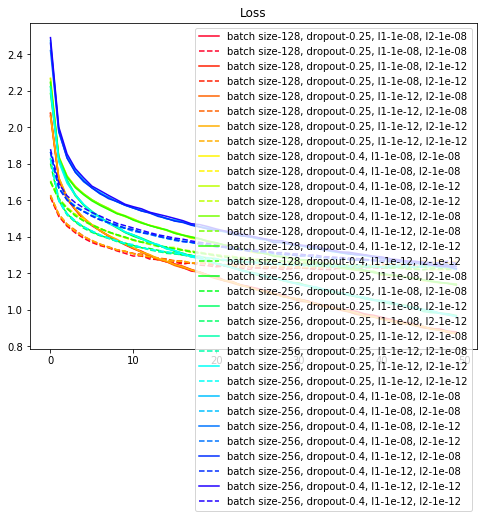

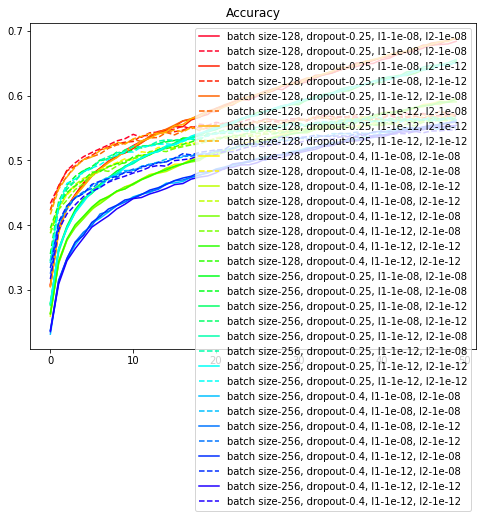

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors

NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()